# Final models

In [2]:
#Loading modules

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Features
from rdkit.Chem import Fragments as fr
from rdkit.Chem import rdMolDescriptors
import tensorflow as tf

import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

from sklearn import metrics
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
import model_stats

In [4]:
# Lets load the data, i have preprocessed it, pslit it randomly and exported it in another notebook
#To make it easier to manipulate here

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
val = pd.read_csv('val.csv')


In [5]:
#Lets drop the unnecessary columns and select our X and y data
train_X = train.drop(['Unnamed: 0', 'ids', 'tox_bin'], axis = 1)
train_y = train['tox_bin']

In [6]:
#Similarly for the val data
val_X = val.drop(['Unnamed: 0', 'ids', 'tox_bin'], axis = 1)
val_y = val['tox_bin']

In [7]:
#And the test data, I have kept the ids column in the test data so we can have a look at the most toxic molecules
test_X = test.drop(['Unnamed: 0', 'tox_bin'], axis = 1)
test_y = test['tox_bin']

In [8]:
clf_stats_dict = {}

# SGD


In [9]:
#Lets first train a simple SGD Classifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

#We should first scale our data
scaler = StandardScaler()

train_X_pre = scaler.fit_transform(train_X)
test_X_pre = scaler.transform(test_X.drop(['ids'], axis = 1))

sgd = SGDClassifier()
sgd.fit(train_X_pre, train_y)

SGDClassifier()

In [10]:
sgd_stats = model_stats.stats(sgd, test_X_pre, test_y)

In [11]:
#The SGD classifier does not predict class probabilities, instead it predicts only a 1 or 0, therefore we can ignore the thresholds
sgd_stats.get_threshold_scores()
print(sgd_stats.best_thresholds())

Best F1 score: 0.528548123980424 at threshold: 0.01 

      
 Best F2 score: 0.538563829787234 at threshold: 0.01
      
 Best Accuracy score: 0.6309067688378033 at threshold: 0.01
      
 Best Combined score: 0.5335559768838289 at threshold: 0.01


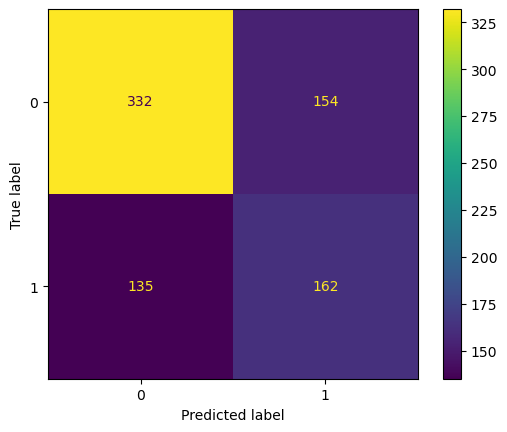

In [12]:
sgd_stats.plot_confusion_matrix()

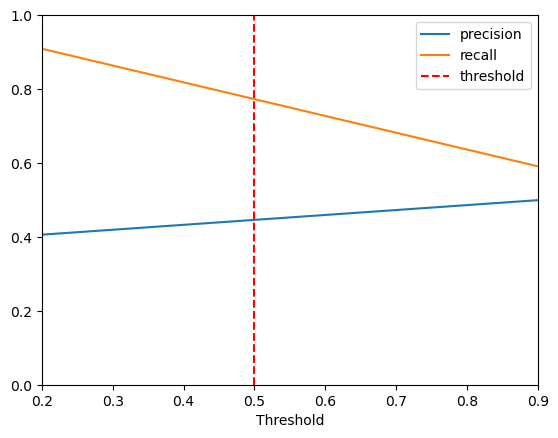

In [13]:
sgd_stats.plot_precision_recall()

In [14]:
clf_stats_dict['sgd'] = sgd_stats

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 20)
rf_clf.fit(train_X_pre, train_y)

RandomForestClassifier(max_depth=20, n_estimators=1000)

In [16]:
rf_stats = model_stats.stats(rf_clf, test_X_pre, test_y)

In [17]:
rf_stats.get_threshold_scores()

In [18]:
print(rf_stats.best_thresholds())

Best F1 score: 0.546112115732369 at threshold: 0.01 

      
 Best F2 score: 0.5228531855955678 at threshold: 0.01
      
 Best Accuracy score: 0.6794380587484036 at threshold: 0.01
      
 Best Combined score: 0.5344826506639684 at threshold: 0.01


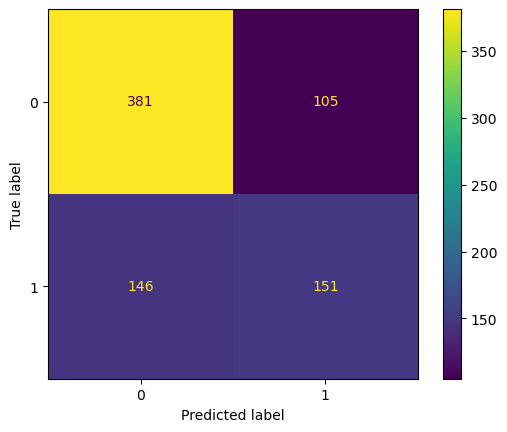

In [19]:
rf_stats.plot_confusion_matrix()

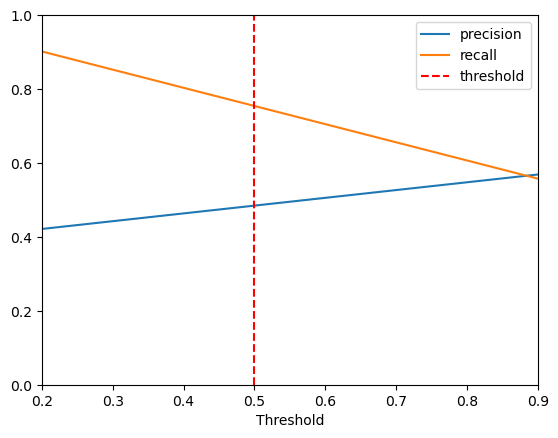

In [20]:
rf_stats.plot_precision_recall()

In [21]:
clf_stats_dict['random_forest_classier'] = rf_stats

# SVM

In [22]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(train_X_pre, train_y)

SVC(probability=True)

In [23]:
svm_stats = model_stats.stats(svm, test_X_pre, test_y)

In [24]:
svm_stats.get_threshold_scores()

In [25]:
print(svm_stats.best_thresholds())

Best F1 score: 0.534923339011925 at threshold: 0.01 

      
 Best F2 score: 0.5311231393775372 at threshold: 0.01
      
 Best Accuracy score: 0.6513409961685823 at threshold: 0.01
      
 Best Combined score: 0.5330232391947312 at threshold: 0.01


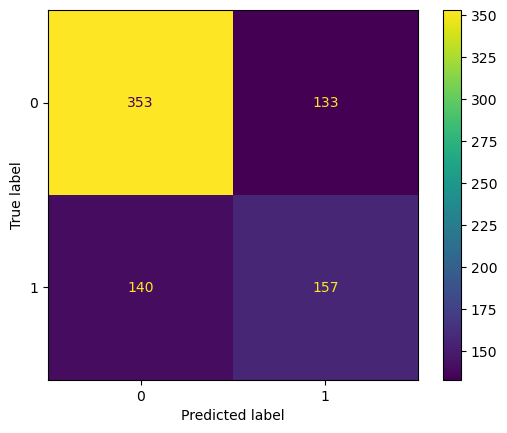

In [26]:
svm_stats.plot_confusion_matrix()

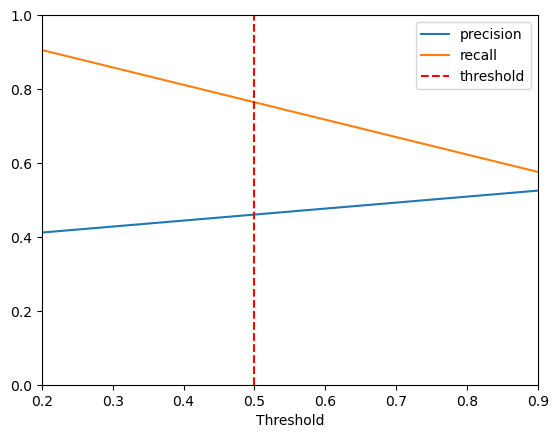

In [27]:
svm_stats.plot_precision_recall()

In [28]:
clf_stats_dict['svm'] = svm_stats

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_X_pre, train_y)

KNeighborsClassifier()

In [30]:
knn_stats = model_stats.stats(knn, test_X_pre, test_y)

In [31]:
knn_stats.get_threshold_scores()

In [32]:
print(knn_stats.best_thresholds())

Best F1 score: 0.5184 at threshold: 0.01 

      
 Best F2 score: 0.5343007915567282 at threshold: 0.01
      
 Best Accuracy score: 0.6155810983397191 at threshold: 0.01
      
 Best Combined score: 0.5263503957783641 at threshold: 0.01


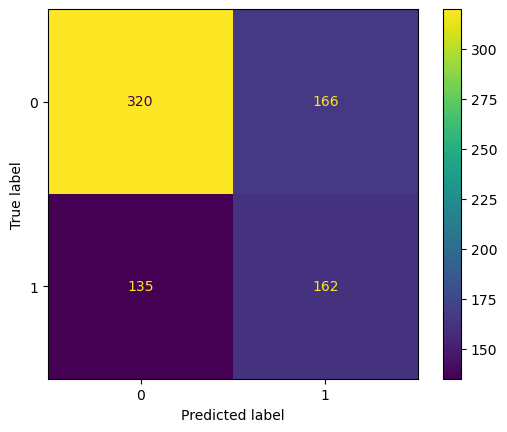

In [33]:
knn_stats.plot_confusion_matrix()

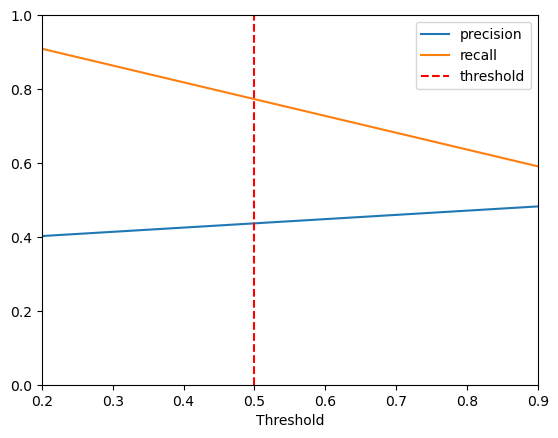

In [34]:
knn_stats.plot_precision_recall()

In [138]:
knn_stats.default_scores['combined score']

0.5263503957783641

In [139]:
clf_stats_dict['knn'] = knn_stats

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

nb_clf.fit(train_X_pre, train_y)

GaussianNB()

Best F1 score: 0.3125 at threshold: 0.01 

      
 Best F2 score: 0.24866105585309867 at threshold: 0.01
      
 Best Accuracy score: 0.6347381864623244 at threshold: 0.01
      
 Best Combined score: 0.2805805279265493 at threshold: 0.01


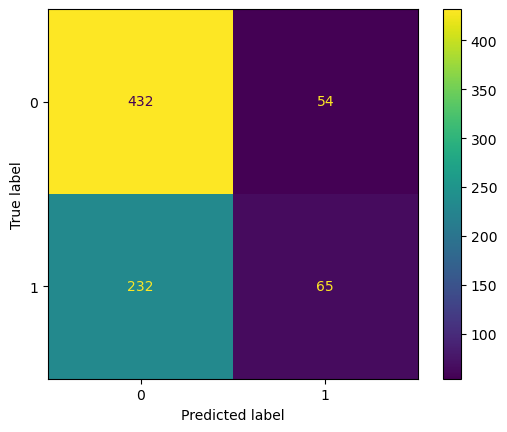

In [37]:
nb_stats = model_stats.stats(nb_clf, test_X_pre, test_y)

nb_stats.get_threshold_scores()

print(nb_stats.best_thresholds())

nb_stats.plot_confusion_matrix()


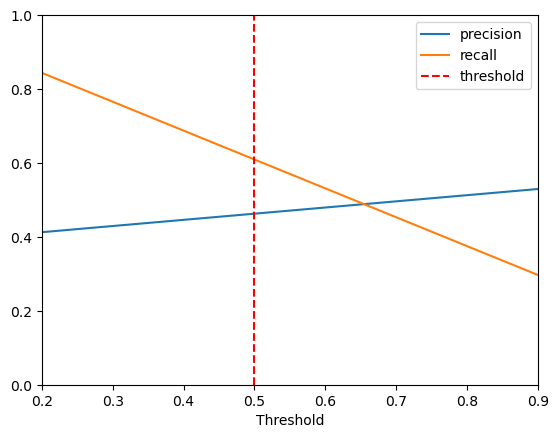

In [38]:
nb_stats.plot_precision_recall()

In [39]:
clf_stats_dict['naive_bayes'] = nb_stats

# Ensemble

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = nb_clf
clf4 = knn
clf5 = svm
clf6 = rf_clf

ensemble = VotingClassifier(
    estimators=[('lr', clf1), 
                ('dt', clf2), 
                ('nb', clf3), 
                ('knn', clf4), 
                ('svc', clf5), 
                ('rf', clf6)], voting='soft')

ensemble.fit(train_X_pre, train_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=1000))],
                 voting='soft')

In [41]:
ensemble_stats = model_stats.stats(ensemble, test_X_pre, test_y)

Best F1 score: 0.5086705202312138 at threshold: 0.01 

      
 Best F2 score: 0.46808510638297873 at threshold: 0.01
      
 Best Accuracy score: 0.6743295019157088 at threshold: 0.01
      
 Best Combined score: 0.4883778133070963 at threshold: 0.01


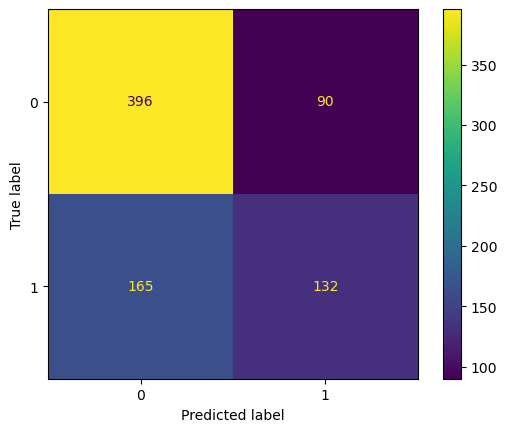

In [42]:
ensemble_stats.get_threshold_scores()

print(ensemble_stats.best_thresholds())

ensemble_stats.plot_confusion_matrix()


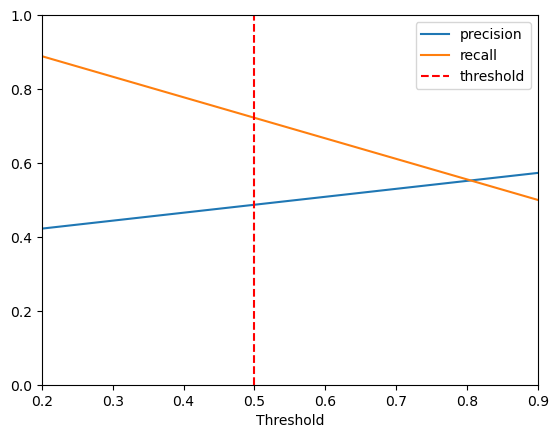

In [43]:
ensemble_stats.plot_precision_recall()

In [44]:
clf_stats_dict['ensemble'] = ensemble_stats

# Multi-layered perceptron

In [45]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1000,300, 50), max_iter=500, activation='relu', solver='adam')

mlp.fit(train_X_pre, train_y)

MLPClassifier(hidden_layer_sizes=(1000, 300, 50), max_iter=500)

Best F1 score: 0.4865771812080537 at threshold: 0.01 

      
 Best F2 score: 0.48755884330867516 at threshold: 0.01
      
 Best Accuracy score: 0.6091954022988506 at threshold: 0.01
      
 Best Combined score: 0.48706801225836444 at threshold: 0.01


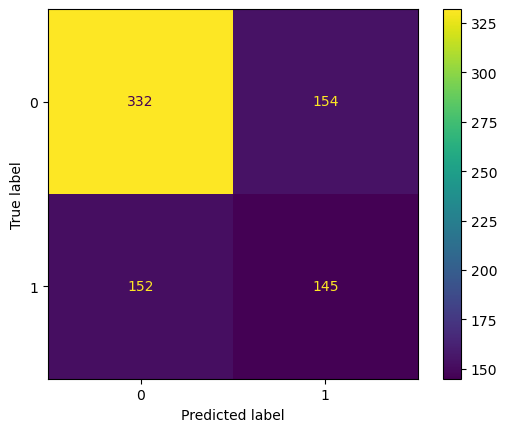

In [46]:
mlp_stats = model_stats.stats(mlp, test_X_pre, test_y)

mlp_stats.get_threshold_scores()

print(mlp_stats.best_thresholds())

mlp_stats.plot_confusion_matrix()

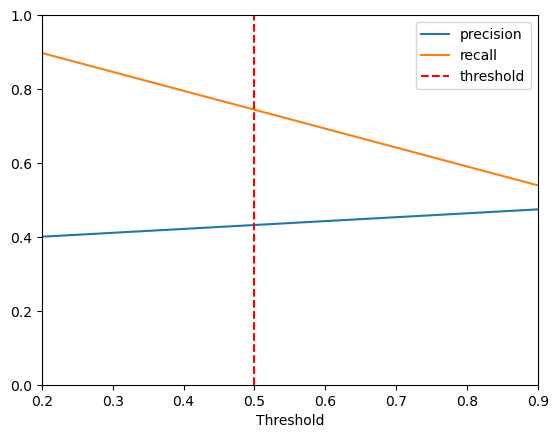

In [47]:
mlp_stats.plot_precision_recall()

In [48]:
clf_stats_dict['mlp'] = mlp_stats

# Tensorflow Keras  model

In [49]:
tf_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(750, activation='relu'), # Create a fully connected dense layer with dense1 number of neurons
    tf.keras.layers.BatchNormalization(), # Batch normalisation reduces variability of our model
    tf.keras.layers.Dropout(rate=0.8), # Dropout will reduce overtraining
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.8),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer
])

tf_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
train_X_tensor = tf.convert_to_tensor(train_X_pre)
train_y_tensor = tf.convert_to_tensor(train_y)

val_X_pre = scaler.transform(val_X)

val_y_tensor = tf.convert_to_tensor(val_y)
val_X_tensor = tf.convert_to_tensor(val_X_pre)

In [51]:
tf_model.fit(train_X_tensor, train_y_tensor, epochs=500, validation_data=(val_X_tensor, val_y_tensor))

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

248/248 [==============================] - 1s 5ms/step - loss: 0.8532 - accuracy: 0.5126 - val_loss: 0.6605 - val_accuracy: 0.6480
Epoch 2/500
248/248 [==============================] - 1s 4ms/step - loss: 0.7465 - accuracy: 0.5190 - val_loss: 0.6582 - val_accuracy: 0.6505
Epoch 3/500
248/248 [==============================] - 1s 5ms/step - loss: 0.7076 - accuracy: 0.5214 - val_loss: 0.6612 - val_accuracy: 0.6505
Epoch 4/500
248/248 [==============================] - 1s 4ms/step - loss: 0.69

In [57]:
tf_model.save('tf_model.h5')

In [52]:
test_X_tensor = tf.convert_to_tensor(test_X_pre)
test_y_tensor = tf.convert_to_tensor(test_y)

In [53]:
tf_model_stats = model_stats.stats(tf_model, test_X_tensor, test_y_tensor)

Best F1 score: 0.5688888888888889 at threshold: 0.3 

      
 Best F2 score: 0.7534246575342466 at threshold: 0.01
      
 Best Accuracy score: 0.6794380587484036 at threshold: 0.6
      
 Best Combined score: 0.6517476164565048 at threshold: 0.13


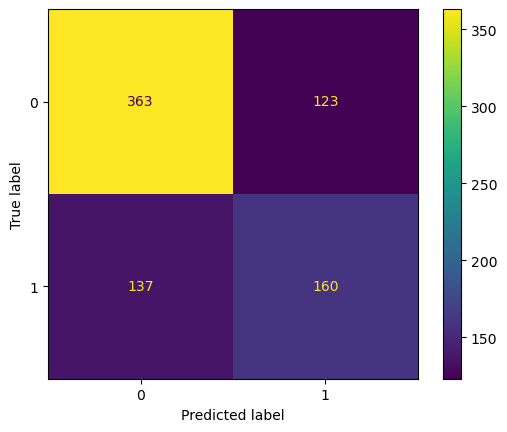

In [54]:
tf_model_stats.get_threshold_scores()

print(tf_model_stats.best_thresholds())

tf_model_stats.plot_confusion_matrix()

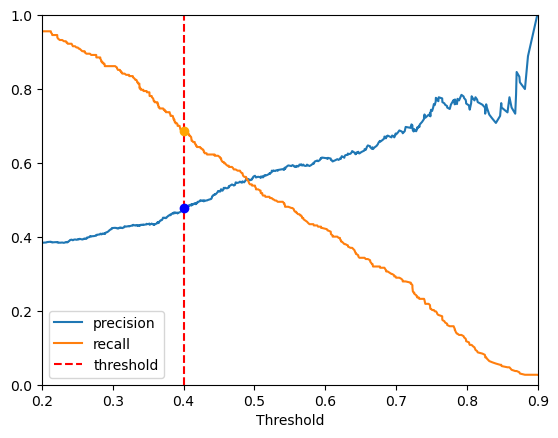

In [58]:
tf_model_stats.plot_precision_recall(threshold=0.4)

In [56]:
clf_stats_dict['tf_model'] = tf_model_stats

# PLotting models

In [140]:
clf_stats_dict

{'sgd': <model_stats.stats at 0x225fa877ef0>,
 'random_forest_classier': <model_stats.stats at 0x225fc092630>,
 'svm': <model_stats.stats at 0x225fc51e518>,
 'knn': <model_stats.stats at 0x22592151908>,
 'naive_bayes': <model_stats.stats at 0x225fc247198>,
 'ensemble': <model_stats.stats at 0x225fc46d6a0>,
 'mlp': <model_stats.stats at 0x225fc068208>,
 'tf_model': <model_stats.stats at 0x22592463668>}

In [152]:
clf_stats_dict['knn'].default_scores['combined score']

0.5263503957783641

In [154]:
models = list(clf_stats_dict.keys())
scores = [(clf_stats_dict[model].default_scores['f1 score'], clf_stats_dict[model].default_scores['f2 score'], clf_stats_dict[model].default_scores['combined score']) for model in models]

In [156]:
for model, score in zip(models, scores):
    print(f'{model}: {score}')

sgd: (0.528548123980424, 0.538563829787234, 0.5335559768838289)
random_forest_classier: (0.546112115732369, 0.5228531855955678, 0.5344826506639684)
svm: (0.534923339011925, 0.5311231393775372, 0.5330232391947312)
knn: (0.5184, 0.5343007915567282, 0.5263503957783641)
naive_bayes: (0.3125, 0.24866105585309867, 0.2805805279265493)
ensemble: (0.5086705202312138, 0.46808510638297873, 0.4883778133070963)
mlp: (0.4865771812080537, 0.48755884330867516, 0.48706801225836444)
tf_model: (0.5517241379310345, 0.5438477226376613, 0.547785930284348)


In [158]:
f1 = [t[0] for t in scores]
f2 = [t[1] for t in scores]
combined = [t[2] for t in scores]

combined

[0.5335559768838289,
 0.5344826506639684,
 0.5330232391947312,
 0.5263503957783641,
 0.2805805279265493,
 0.4883778133070963,
 0.48706801225836444,
 0.547785930284348]

In [159]:
#Lets sort the values depending on combined score
sorted_indices = np.argsort(combined)[::-1]
models = [models[i] for i in sorted_indices]
f1 = [f1[i] for i in sorted_indices]
f2 = [f2[i] for i in sorted_indices]
combined = [combined[i] for i in sorted_indices]

combined

[0.547785930284348,
 0.5344826506639684,
 0.5335559768838289,
 0.5330232391947312,
 0.5263503957783641,
 0.4883778133070963,
 0.48706801225836444,
 0.2805805279265493]

In [196]:
#This function will save our figure to a file
from pathlib import Path

IMG_PATH = Path() / 'figures'


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMG_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()

    plt.savefig(path, format=fig_extension, dpi=resolution)


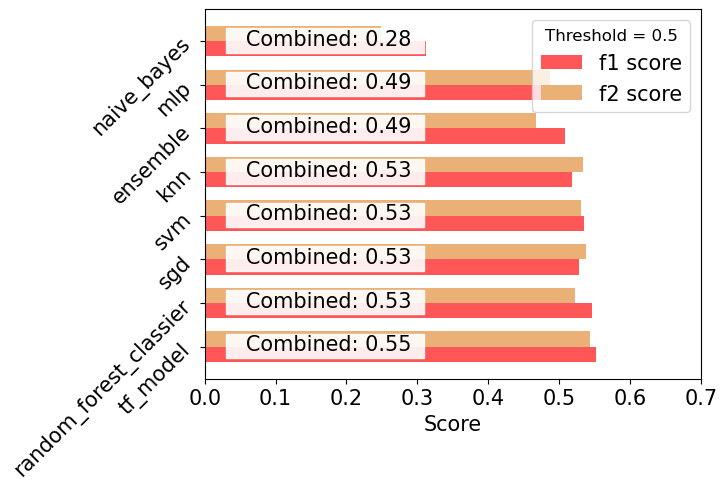

In [213]:
import matplotlib.patches as patches
import matplotlib as mpl

mpl.rcParams['font.size'] = 15

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the y-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plot the f1 scores as blue horizontal bars
plt.barh(r1, f1, color='#ff5758', height=bar_width, label='f1 score')

# Plot the f2 scores as orange horizontal bars
plt.barh(r2, f2, color='#ebb075', height=bar_width, label='f2 score')

# Add y-axis labels and tick labels
plt.yticks([r + bar_width / 2 for r in range(len(models))], models)
plt.xlabel('Score')

plt.xlim([0, 0.7])

plt.tick_params(axis='y', rotation=45)

label_x_pos = 0.03

for i, v in enumerate(combined):
    plt.text(label_x_pos, i, f'   Combined: {str(round(v, 2))}', va='bottom', ha='left')

    plt.gca().add_patch(
        patches.Rectangle(
            (label_x_pos, i-(bar_width/4)), 
            0.28, bar_width*1.6, 
            color='white', alpha=0.9))

# Add a legend
legend = plt.legend(title='Threshold = 0.5')

legend.get_title().set_fontsize('12')
#plt.subplots_adjust(right=1.3)

save_fig('combined score plot', tight_layout=False)

# Show the plot
plt.show()

